# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [21]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [22]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [23]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [24]:
#function

df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 

GRE score is out of 800, so it will have a higher standard deviation (spread) than GPA, which is only out of 4.0. 

#### Question 4. Drop data points with missing data


In [25]:
df_raw.isnull().any()

admit       False
gre          True
gpa          True
prestige     True
dtype: bool

In [26]:
df_clean = df_raw[df_raw.notnull().all(axis=1)]

#### Question 5. Confirm that you dropped the correct data. How can you tell?


In [27]:
df_clean.isnull().any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

In [28]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: 

Check if any values are still null in df_clean, using isnull().any(). All say 'False', which means there are no null columns.

#### Question 6. Create box plots for GRE and GPA

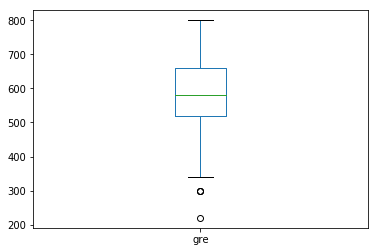

In [29]:
#boxplot 1

df_clean['gre'].plot(kind='box')

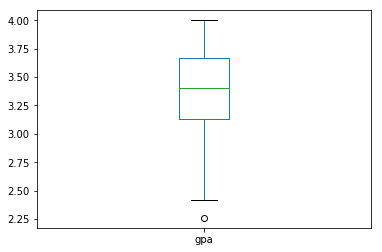

In [30]:
#boxplot 2 
df_clean['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: 

Plot shows the median, min, max, 1st and 3rd quartile for each set, and any outliers. 

#### Question 8. Describe each distribution 

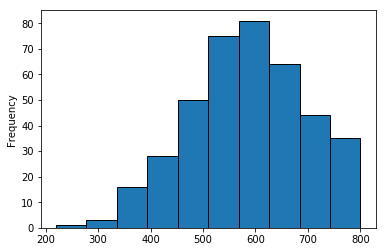

In [31]:
# plot the distribution of each variable 

df_clean['gre'].plot(kind='hist',edgecolor='black')

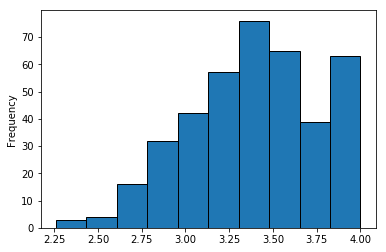

In [32]:
df_clean['gpa'].plot(kind='hist',edgecolor='black')

GPA is left skewed slightly, with the mean less than the median. This is because there is a larger proportion of students who received a almost-perfect GPA that is close to 4.0. 

GRE score is slightly right skewed. The mean is slightly higher than the median. It is however, more symetrical than GPA. 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

Yes, for a distribution to be normal the mean would need to be very close to the median, which in both instances our data sets are.  Both sides are also fairly symetrical.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

No, there are only a few outliers in our dataset and our dataset is also fairly normal, so no correction would be needed here. 

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


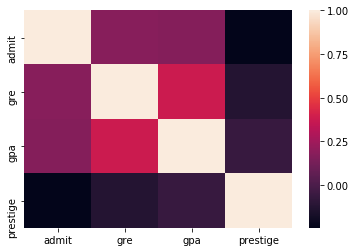

In [14]:
sns.heatmap(df_clean.corr())

#### Question 12. What did you find?

Answer: It doesn't look like any of our variables are colinear. If variables are colinear, the correlation should be very close to 1. In our case, besides the actual variable to itself, none of the other variables to each other are close to 1. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

To start out I would first break down the data into those who were admitted and those who were not. 

Since Admit is either 1 or 0, I would take a look at the distribution of prestige those who were admitted and not admitted. The graphs show me that those admitted were more skewed to the left (prestige is lower), while those who were not admitted are a bit more skewed to the right (prestige is higher). 

I would also then look at the mean and std of prestige each group. The mean of those admitted is 2.15 while those not admitted is 2.64. 

Both of the above is in-line with the correlation between the 2 variables, which we know from above is -0.24. This means that as prestige goes down, the admit goes up. 

count    126.000000
mean       2.150794
std        0.921455
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

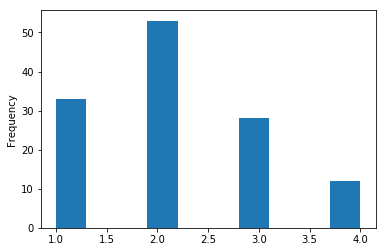

In [15]:
df_clean[df_clean['admit'] == 1]['prestige'].plot(kind='hist')
df_clean[df_clean['admit'] == 1]['prestige'].describe()

count    271.000000
mean       2.645756
std        0.918922
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

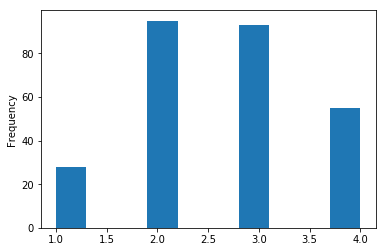

In [16]:
df_clean[df_clean['admit'] == 0]['prestige'].plot(kind='hist')
df_clean[df_clean['admit'] == 0]['prestige'].describe()

In [17]:
print 'admit percentag:', df_clean['admit'].mean()
print 'average prestige:', df_clean['prestige'].mean()

admit percentag: 0.317380352645
average prestige: 2.48866498741


This tells me that those who have a lower prestige is more likely to be admitted. Since the prediction variable is categorical (1 or 0), the way I can actually predict the probability of admit is using a Logistic Regression.

Logistic Regression is used in instances where the response variable is categorical. In our case, since the outcome of admit is either 0 or 1, logistic regression takes the linear combination of the explanatory variable (prestige) plus and intercept, and then passes it through the logistic function. 

The function is between a 0 and the 1, and the output is interpreted as a probability. In our case, it is the probability of admit, given the prestige of alma mater for a student. 

#### Question 14. What is your hypothesis? 

Answer: 

My hypothesis is that the probability of admit goes up as the ranking of prestige decreases. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [18]:
# First, Find rows where the is null Find index of rows where data is null
df_raw.describe()
null_columns = df_raw.columns[df_raw.isnull().any()]
df_raw[df_raw.isnull().any(axis=1)][null_columns]

,gre,gpa,prestige
187,NaN,NaN,2.0
212,NaN,2.87,2.0
236,660.0,NaN,NaN


In [19]:
# Drop those specific rows
df_raw.drop([187,212,236], inplace = True)

In [34]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data